In [1]:
# This is just importing certain libraries we will use consistently throughouit the porject
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import random
import requests

In [2]:
!pip install graphviz

In [3]:
df = pd.read_csv("ETH-USD.csv")
df.dropna(inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-01,737.708374,749.201843,719.792236,730.367554,730.367554,1.365200e+10
1,2021-01-02,730.402649,786.798462,718.109497,774.534973,774.534973,1.974077e+10
2,2021-01-03,774.511841,1006.565002,771.561646,975.507690,975.507690,4.520046e+10
3,2021-01-04,977.058838,1153.189209,912.305359,1040.233032,1040.233032,5.694599e+10
4,2021-01-05,1041.498779,1129.371460,986.811279,1100.006104,1100.006104,4.153593e+10


In [ ]:
# Import necessary libraries
import ccxt
from sklearn.ensemble import RandomForestClassifier

# Set up the exchange API
exchange = ccxt.binance({
    'apiKey': 'YOUR_API_KEY',
    'secret': 'YOUR_SECRET_KEY',
})

# Define your trading strategy
def trading_strategy():
    # Prepare the data for the Random Forest model
    df['target'] = df['close'].shift(-1) > df['close']  # Create the target variable (1 if next day's close is higher)
    df = df.dropna()  # Remove NaN values
    
    # Split the data into features and target variable
    features = df[['open', 'high', 'low', 'close', 'volume']]
    target = df['target']
    
    # Train the Random Forest model
    model = RandomForestClassifier()
    model.fit(features, target)
    
    # Get the latest market data
    ticker = exchange.fetch_ticker('BTC/USDT')
    current_data = [ticker['open'], ticker['high'], ticker['low'], ticker['close'], ticker['volume']]
    
    # Predict the next day's price movement using the trained model
    predicted_movement = model.predict([current_data])[0]
    
    # Implement your trading logic here based on the predicted movement
    if predicted_movement == 1:
        # Place a buy order
        order = exchange.create_order(
            symbol='BTC/USDT',
            type='market',
            side='buy',
            amount=0.001,
        )
    else:
        # Place a sell order
        order = exchange.create_order(
            symbol='BTC/USDT',
            type='market',
            side='sell',
            amount=0.001,
        )

# Run the trading bot for a specific number of iterations
iterations = 100 

for i in range(iterations):
    trading_strategy()

    # Check for a stopping condition
    if i + 1 == iterations:
        break



In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df[['High', 'Low', 'Open', 'Close', 'Adj Close']]
y = df['Volume']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 6.212792931048305e+19
R-squared: 0.3919534509469397


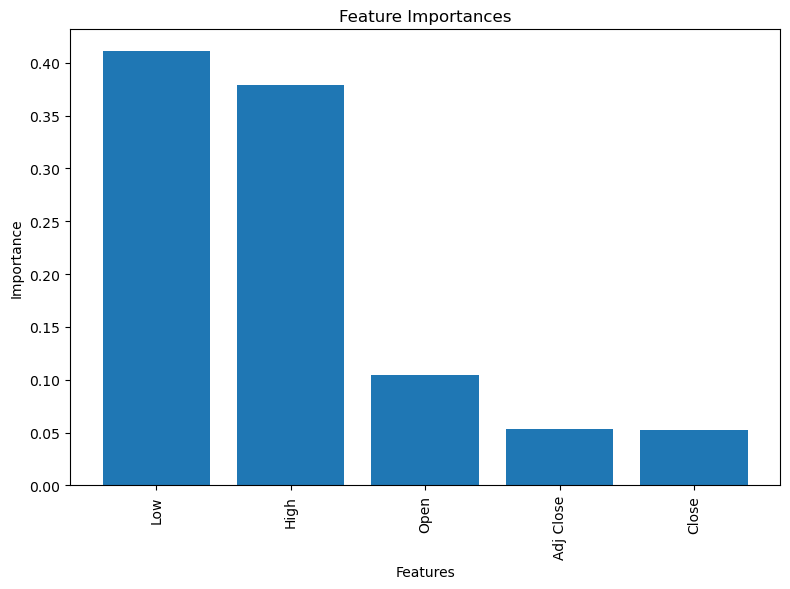

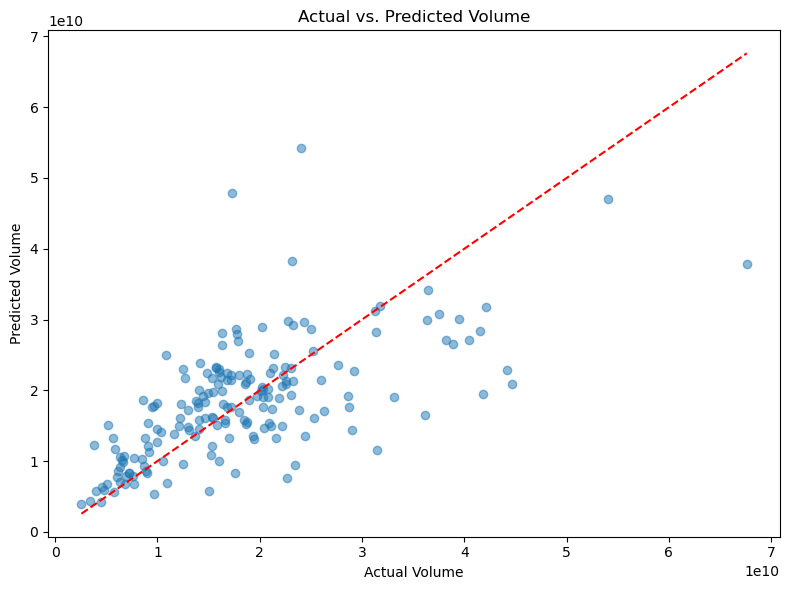

In [5]:
# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
sorted_feature_names = [feature_names[i] for i in indices]

# Bar plot of feature importances
plt.figure(figsize=(8, 6))
plt.bar(range(len(importances)), importances[indices], tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

# Scatter plot of actual vs. predicted volume
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Volume')
plt.ylabel('Predicted Volume')
plt.title('Actual vs. Predicted Volume')
plt.tight_layout()
plt.show()


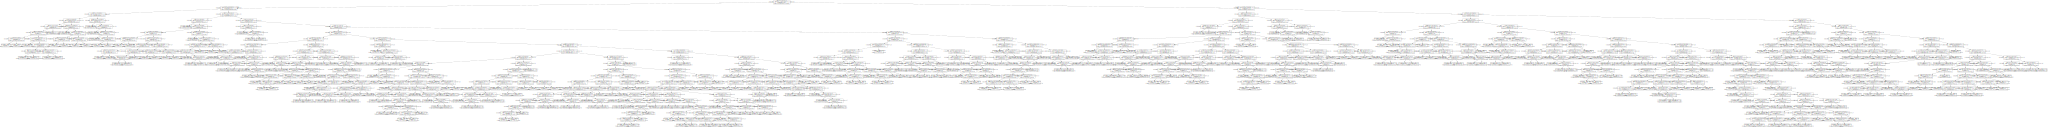

In [11]:
from sklearn import tree
import graphviz

# Choose an individual decision tree from the Random Forest
tree_estimator = rf_model.estimators_[0]

# Export the decision tree as a DOT file
dot_data = tree.export_graphviz(tree_estimator, out_file=None, feature_names=X.columns)

# Create a Graphviz object from the DOT data
graph = graphviz.Source(dot_data)

# Render the decision tree
graph.render("decision_tree")

# Display the decision tree
graph


In [ ]:
def coins():
    currencies = []
    for

In [ ]:
import urllib.parse
import time
import hashlib
import hmac
import base64

def get_kraken_signature(urlpath, data, secret):

    postdata = urllib.parse.urlencode(data)
    encoded = (str(data['nonce']) + postdata).encode()
    message = urlpath.encode() + hashlib.sha256(encoded).digest()

    mac = hmac.new(base64.b64decode(secret), message, hashlib.sha512)
    sigdigest = base64.b64encode(mac.digest())
    return sigdigest.decode()

api_sec = "kQH5HW/8p1uGOVjbgWA7FunAmGO8lsSUXNsu3eow76sz84Q18fWxnyRzBHCd3pd5nE9qa99HAZtuZuj6F1huXg=="

data = {
    "nonce": str(int(1000*time.time()))
}

signature = get_kraken_signature("/0/public/Assets", data, api_sec)
print("API-Sign: {}".format(signature))